# Naive Bayes Classificator

Read Dataset
--

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df = df.dropna()
df.reset_index()

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_encoded = df.apply(LabelEncoder().fit_transform)

Split dataset into train and test set
--

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( df_encoded[df_encoded.columns[:-1]],  df_encoded['stroke'], test_size=0.2)

In [ ]:
X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded['stroke']

Naive Bayes Classificator
--

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.decomposition import PCA

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

conf_matrix = pd.crosstab(Y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
conf_matrix

Predicted,0,1
Actual,,
0,850,96
1,20,16


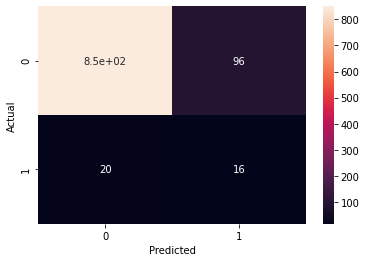

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy_score(Y_test, y_pred)

0.8818737270875764

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       946
           1       0.14      0.44      0.22        36

    accuracy                           0.88       982
   macro avg       0.56      0.67      0.58       982
weighted avg       0.95      0.88      0.91       982



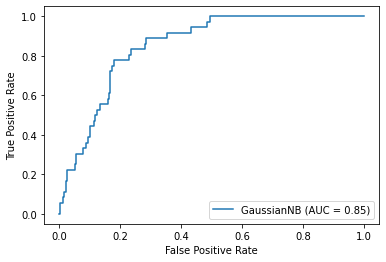

In [ ]:
plot_roc_curve(model, X_test, Y_test)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_val_score(model, X_test, Y_test, cv=5, scoring='accuracy')

scores

array([0.88324873, 0.82741117, 0.93367347, 0.86734694, 0.90306122])

In [ ]:
print("Mean: ", scores.mean(), " Std: ", scores.std())

Mean:  0.8829483062260437  Std:  0.03551179622796596


In [ ]:
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model, X_test, Y_test, cv=5, scoring=scoring)
scores

{'fit_time': array([0.00939989, 0.00177383, 0.0017817 , 0.00171161, 0.00169349]),
 'score_time': array([0.00358748, 0.00234628, 0.00222754, 0.00220132, 0.00219369]),
 'test_precision_macro': array([0.511018  , 0.53172348, 0.65069444, 0.52902739, 0.57209738]),
 'test_recall_macro': array([0.52669173, 0.61078042, 0.82804233, 0.58730159, 0.67460317])}

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

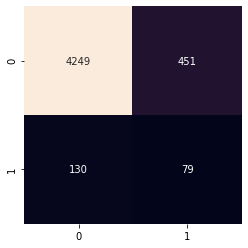

In [ ]:
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)

In [ ]:
pca = PCA(2)

pca.fit(X)
X_pca = pca.transform(X)

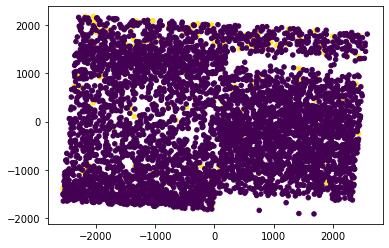

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=20)

In [ ]:
!pip install pomegranate

In [ ]:
from pomegranate import *

In [ ]:
model = BayesianNetwork.from_samples(df.head(1000).to_numpy(), state_names = df.columns.values, algorithm='chow-liu')

In [ ]:
import matplotlib
from graphviz import *

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

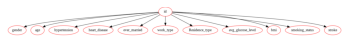

In [ ]:
model.plot()

In [ ]:
model.sample()

array([['37726', 'Female', '80.0', '1', '0', 'Yes', 'Self-employed',
        'Urban', '68.56', '26.2', 'Unknown', '1']], dtype='<U32')

In [ ]:
model.predict([[None, 'Male', 35.0, 1, 1, 'No', None, None, 70.09, 32, None, None]])

[array([53882, 'Male', 35.0, 1, 1, 'No', 'Private', 'Rural', 70.09, 32,
        'never smoked', 1], dtype=object)]

In [ ]:
model.predict_proba([[None, 'Male', 35.0, 1, 1, 'No', None, None, 70.09, 32, None, None]])

[array([{
            "class" : "Distribution",
            "dtype" : "int",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "28674" : 0.0,
                    "22537" : 0.0,
                    "28681" : 0.0,
                    "40970" : 0.0,
                    "22540" : 0.0,
                    "69645" : 0.0,
                    "10255" : 0.0,
                    "24592" : 0.0,
                    "16402" : 0.0,
                    "61465" : 0.0,
                    "57372" : 0.0,
                    "53279" : 0.0,
                    "30753" : 0.0,
                    "65574" : 0.0,
                    "8233" : 0.0,
                    "69673" : 0.0,
                    "34857" : 0.0,
                    "59437" : 0.0,
                    "43054" : 0.0,
                    "14387" : 0.0,
                    "55351" : 0.0,
                    "69687" : 0.0,
                    "14391" : 0.0,
                    "20541"